# <b>CS156 (Introduction to AI), Spring 2021</b>


#### Implementation of a linear regression model to predict a country's happiness score (input data: https://www.kaggle.com/unsdsn/world-happiness )

##  <u>Solution</u>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

np.random.seed(42)

In [2]:
X = pd.read_csv("homework3_input_data.csv")
col = X['Happiness Score']
Y = col
df = pd.DataFrame(X, columns = ['Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity','Dystopia Residual'])
print (df)

df['Happiness'] = Y
df.head()

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   
2                     1.32548  1.36058                   0.87464  0.64938   
3                     1.45900  1.33095                   0.88521  0.66973   
4                     1.32629  1.32261                   0.90563  0.63297   
..                        ...      ...                       ...      ...   
153                   0.22208  0.77370                   0.42864  0.59201   
154                   0.28665  0.35386                   0.31910  0.48450   
155                   0.66320  0.47489                   0.72193  0.15684   
156                   0.01530  0.41587                   0.22396  0.11850   
157                   0.20868  0.13995                   0.28443  0.36453   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0      

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [3]:
df.describe()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


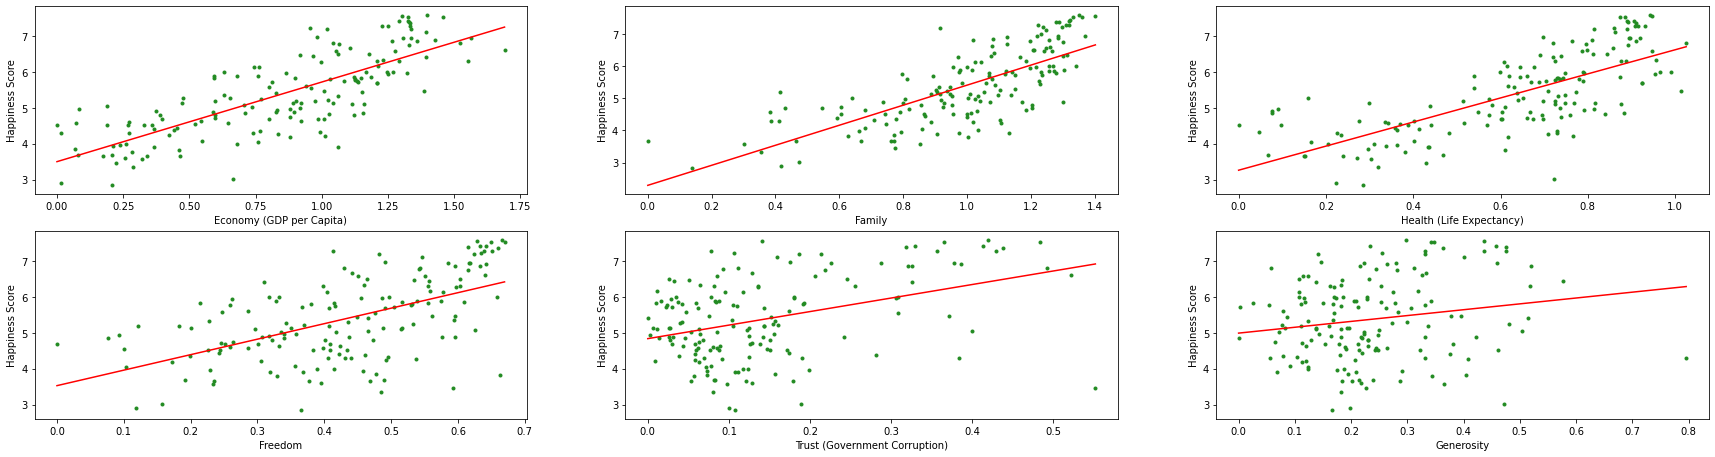

In [4]:
plt.figure(figsize=(30,20))
for i, col in enumerate(df.columns[0:6]):
    plt.subplot(5, 3, i+1)
    x = df[col]
    y = df['Happiness']
    plt.plot(x, y, '.', color="forestgreen")
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color="red")
    plt.xlabel(col)
    plt.ylabel('Happiness Score')

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(


Text(0, 0.5, 'Probability Density')

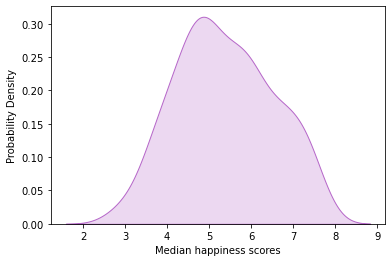

In [5]:
sns.kdeplot(df['Happiness'], color='#b667c9', shade=True, Label='Happiness Score')
plt.xlabel('Median happiness scores') 
plt.ylabel('Probability Density') 

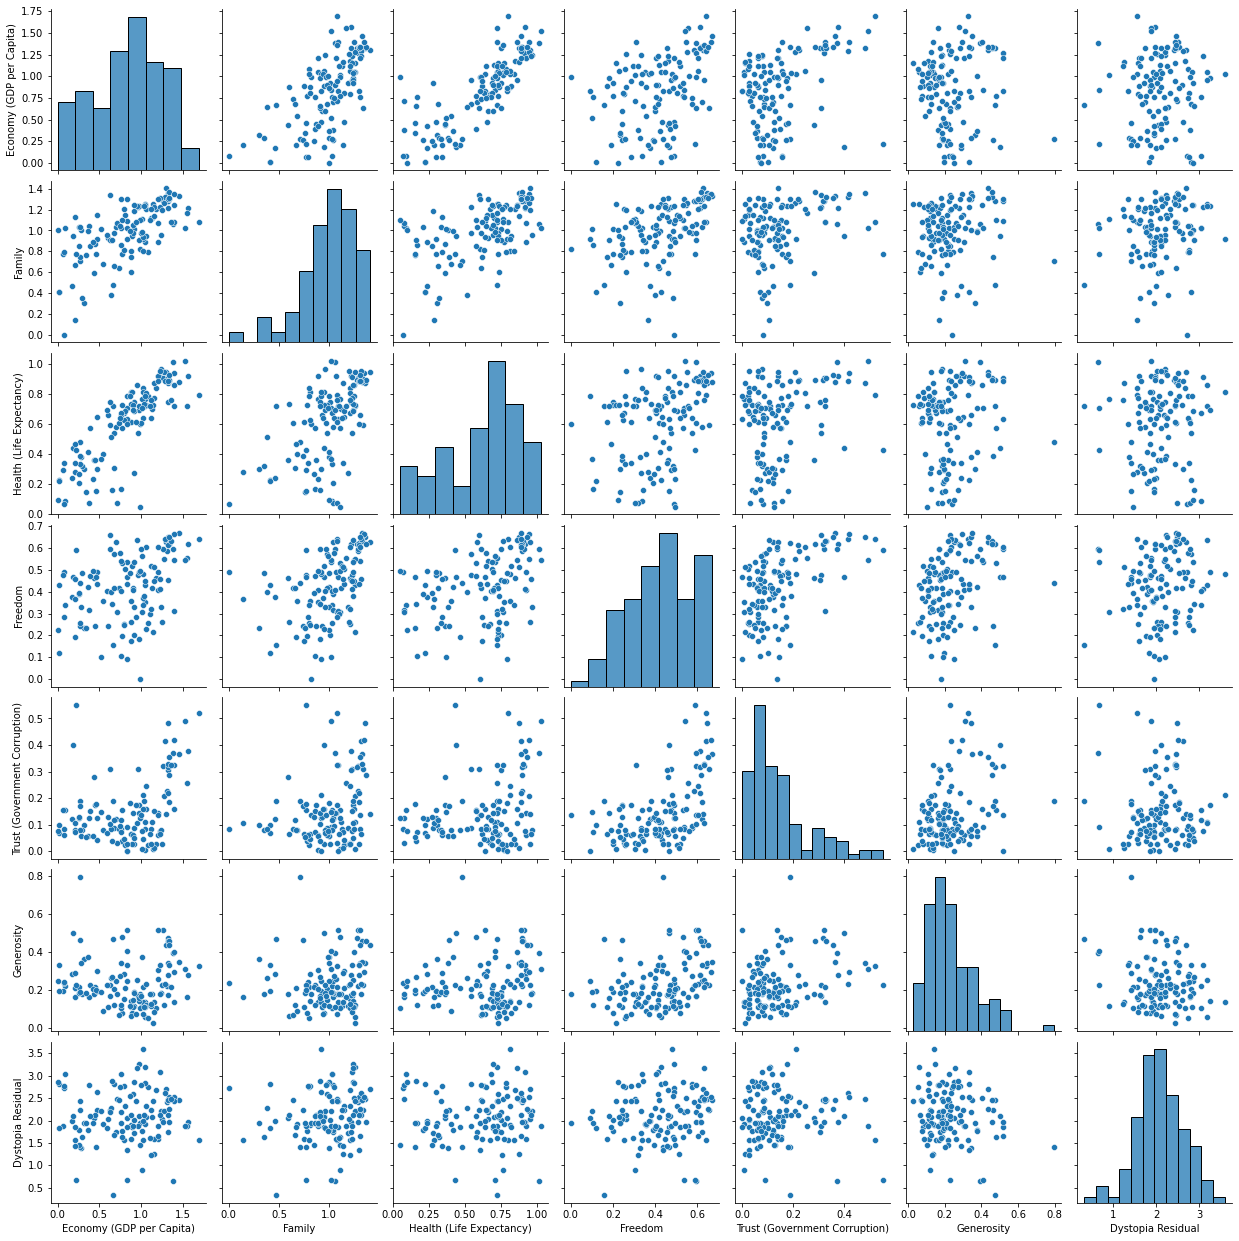

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

train_df = pd.DataFrame(X_train,columns = ['Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity','Dystopia Residual'])
train_df['Happiness'] = Y_train
sns.pairplot(train_df, vars = ['Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity','Dystopia Residual'])

In [7]:
model = linear_model.Ridge().fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Mean squared error: 0.00
Coefficient of determination: 1.00
